In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# train_dir = '/content/drive/My Drive/chest_xray2/train'
# test_dir = '/content/drive/My Drive/chest_xray2/test'
# val_dir = '/content/drive/My Drive/chest_xray2/val'

# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(320, 320),
#     batch_size=32,
#     class_mode='binary',
#     shuffle=True
# )

# test_generator = val_datagen.flow_from_directory(
#     test_dir,
#     target_size=(320, 320),
#     batch_size=32,
#     class_mode='binary',
#     shuffle=True
# )

# val_generator = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=(320, 320),
#     batch_size=32,
#     class_mode='binary',
#     shuffle=True
# )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/chest_xray2/train',
    image_size=(320, 320),
    batch_size=32,
    shuffle = True
)
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/chest_xray2/test',
    image_size=(320, 320),
    batch_size=32
)
dataset_val = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/chest_xray2/val',
    image_size=(320, 320),
    batch_size=32
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [5]:
for images, labels in dataset.take(1):  # Sadece ilk batch
    print("Görüntülerin Şekli:", images.shape)
    print("Etiketler:", labels.numpy())

Görüntülerin Şekli: (32, 320, 320, 3)
Etiketler: [1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [ ]:
# labels = []

# # Tüm batch'ler üzerinden geç
# for i, (images, batch_labels) in enumerate(train_generator):
#     labels.extend(batch_labels)  # Etiketleri listeye ekle
#     if i >= len(test_generator) - 1:  # Tüm batch'leri işledikten sonra çık
#         break

# # Etiketleri metin olarak dönüştür
# label_names = ["Pneumonia" if label == 0 else "Normal" for label in labels]

# # Görselleştirme
# sns.set_style('darkgrid')
# sns.countplot(x=label_names)
# plt.title('Label Distribution in Training Set')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()

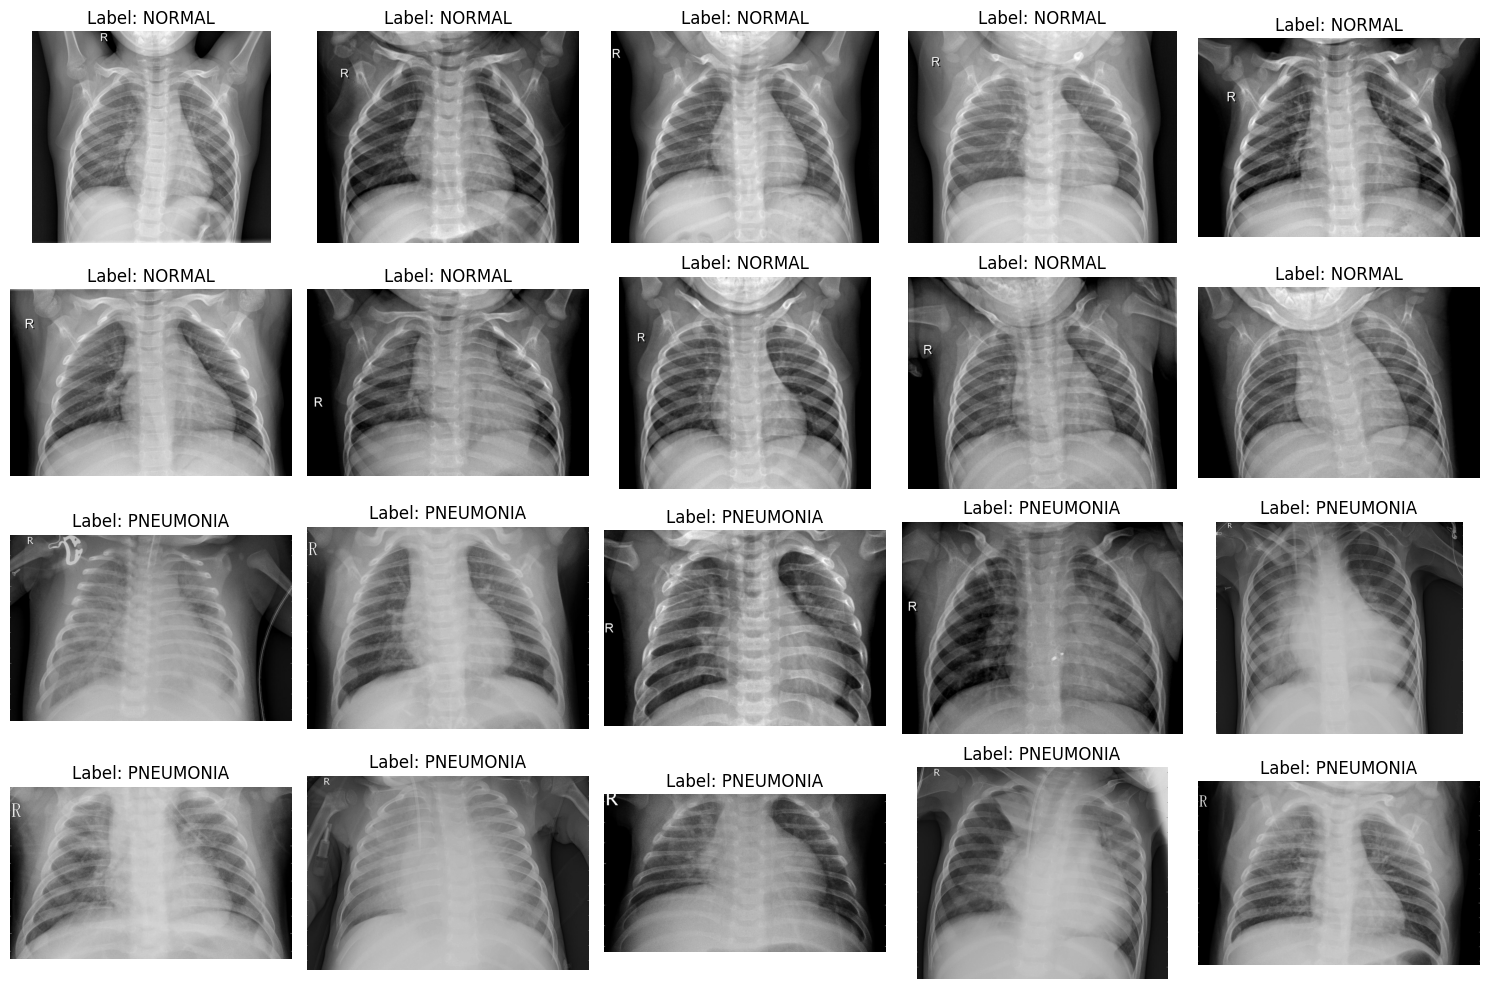

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Dosya yolları
normal_dir = "/content/drive/My Drive/chest_xray2/train/NORMAL"
pneumonia_dir = "/content/drive/My Drive/chest_xray2/train/PNEUMONIA"

# Görselleri listele
normal_images = sorted(os.listdir(normal_dir))[:10]  # İlk 10 görsel
pneumonia_images = sorted(os.listdir(pneumonia_dir))[:10]  # İlk 10 görsel

# Görselleştirme
plt.figure(figsize=(15, 10))

# NORMAL sınıfı
for i, image_name in enumerate(normal_images):
    img_path = os.path.join(normal_dir, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(4, 5, i + 1)  # 4x5 grid
    plt.imshow(img, cmap="gray")  # Siyah beyaz gösterim için cmap
    plt.title("Label: NORMAL")
    plt.axis("off")

# PNEUMONIA sınıfı
for i, image_name in enumerate(pneumonia_images):
    img_path = os.path.join(pneumonia_dir, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(4, 5, i + 11)  # 4x5 grid (11. hücreden başlar)
    plt.imshow(img, cmap="gray")
    plt.title("Label: PNEUMONIA")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(320, 320, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 318, 318, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 159, 159, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 157, 157, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 78, 78, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 76, 76, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 92416)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      23,658,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,715,329 (90.47 MB)

 Trainable params: 23,715,329 (90.47 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
hist = model.fit(dataset, epochs=4, validation_data=dataset_val)

Epoch 1/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 1261s 8s/step - accuracy: 0.7856 - loss: 52.9410 - val_accuracy: 0.6875 - val_loss: 0.5977
Epoch 2/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 1247s 8s/step - accuracy: 0.8998 - loss: 0.2708 - val_accuracy: 0.6875 - val_loss: 0.8955
Epoch 3/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 1275s 8s/step - accuracy: 0.9367 - loss: 0.1773 - val_accuracy: 0.6875 - val_loss: 1.6681
Epoch 4/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 1337s 8s/step - accuracy: 0.9301 - loss: 0.1804 - val_accuracy: 0.7500 - val_loss: 1.6507


In [13]:
model.save('finalmodel.h5')

In [ ]:
from keras.models import load_model

model_path = '/content/drive/My Drive/finalmodel.h5'

from keras.models import load_model
loaded_model = load_model(model_path)

In [17]:
#predictions = loaded_model.predict(test_dataset)
predictions = model.predict(dataset_test)
binary_predictions = (predictions > 0.5).astype(int)

# Sonuçları yazdır
print("Binary Predictions:")
print(binary_predictions)


20/20 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step
Binary Predictions:
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 

In [18]:
labels2 = []
for images, labels in dataset:
    labels2.append(labels)
    break

In [19]:
labels2

[<tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int32)>]

In [21]:

from keras.preprocessing.image import load_img, img_to_array

# Görsel yollarını ayarla
normal_dir = '/content/drive/My Drive/chest_xray2/train/NORMAL'
pneumonia_dir = '/content/drive/My Drive/chest_xray2/train/PNEUMONIA'

# İlk 10 görselin yollarını al
normal_images = sorted(os.listdir(normal_dir))[:20]
pneumonia_images = sorted(os.listdir(pneumonia_dir))[:20]

# Model tahmini ve görselleştirme
def predict_and_visualize(image_paths, true_label, base_dir, model):
    plt.figure(figsize=(20, 10))
    for i, img_name in enumerate(image_paths):
        # Görseli yükle ve işleme
        img_path = os.path.join(base_dir, img_name)
        img = load_img(img_path, target_size=(150, 150))  # Modelin giriş boyutuna göre ayarla
        img_array = img_to_array(img) / 255.0  # Normalizasyon
        img_array = np.expand_dims(img_array, axis=0)

        # Tahmin yap
        prediction = model.predict(img_array)
        predicted_label = int(prediction > 0.5)

        # Görselleştirme
        plt.subplot(2, 10, i + 1)
        plt.imshow(img)
        plt.axis("off")
        color = "black" if predicted_label == true_label else "red"
        plt.title(f"Pred: {predicted_label}", color=color)
    plt.tight_layout()
    plt.show()

# NORMAL görsellerini tahmin ve görselleştir
print("NORMAL Görseller:")
predict_and_visualize(normal_images, true_label=0, base_dir=normal_dir, model=model)

# PNEUMONIA görsellerini tahmin ve görselleştir
print("PNEUMONIA Görseller:")
predict_and_visualize(pneumonia_images, true_label=1, base_dir=pneumonia_dir, model=model)

NORMAL Görseller:


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 92416, but received input with shape (1, 18496)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 150, 150, 3), dtype=float32)
  • training=False
  • mask=None

<Figure size 2000x1000 with 0 Axes>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

# NORMAL ve PNEUMONIA dizinlerinden ilk 5 görüntüyü yükleyin
normal_images = [os.path.join(normal_dir, fname) for fname in os.listdir(normal_dir)[:5]]
pneumonia_images = [os.path.join(pneumonia_dir, fname) for fname in os.listdir(pneumonia_dir)[:5]]

# Görüntüleri model için uygun hale getirme (320x320 ve normalize etme)
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(320, 320))  # Görüntüyü yükle ve boyutlandır
    img_array = img_to_array(img) / 255.0  # Görüntüyü diziye dönüştür ve normalize et
    return np.expand_dims(img_array, axis=0)  # Modelin alması için boyutları düzenle

# NORMAL ve PNEUMONIA dizinlerinden görüntüleri yükle ve tahmin yap
all_images = normal_images + pneumonia_images
labels = [0] * 5 + [1] * 5  # NORMAL için etiket 0, PNEUMONIA için etiket 1

# Model tahminlerini al
predictions = []
for img_path in all_images:
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)  # Model ile tahmin yap
    predictions.append(prediction)

# Görselleştirme
plt.figure(figsize=(15, 10))
for i, (img_path, prediction, true_label) in enumerate(zip(all_images, predictions, labels)):
    img = image.load_img(img_path, target_size=(320, 320))  # Görüntüyü yükle
    plt.subplot(2, 5, i+1)
    plt.imshow(img)

    # Tahmin doğruysa siyah, yanlışsa kırmızı
    pred_class = 1 if prediction >= 0.5 else 0
    color = 'black' if pred_class == true_label else 'red'

    plt.title(f"Pred: {pred_class}, True: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(dataset)

# Doğruluk skorunu yazdır
print(f"Model Accuracy: {accuracy:.2f}")

 52/163 ━━━━━━━━━━━━━━━━━━━━ 5:24 3s/step - accuracy: 0.9420 - loss: 0.1450

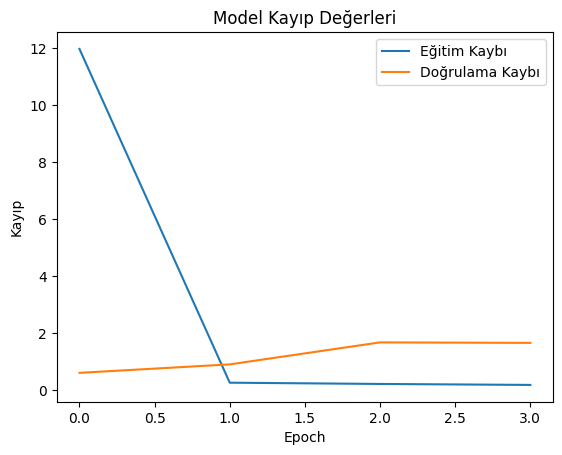

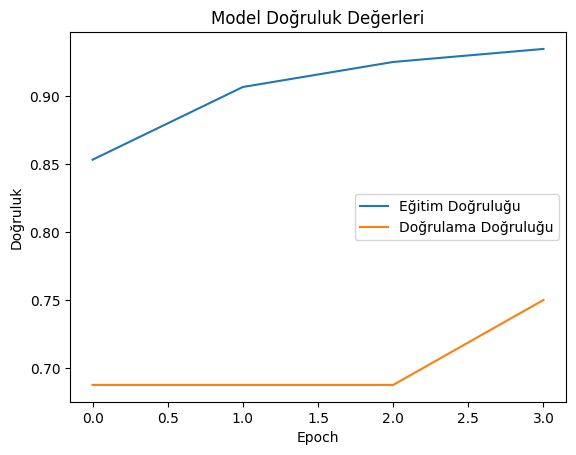

In [23]:
plt.plot(hist.history['loss'], label='Eğitim Kaybı')
plt.plot(hist.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kayıp Değerleri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Doğruluk Grafiği
plt.plot(hist.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(hist.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluk Değerleri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()